## Base Configurations

In [1]:
#import pymongo
import pandas as pd
#from pymongo import MongoClient
from random import random
import json

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

## Read Data

In [2]:
# Read data from your Mongo DB
# df_individual 
# df_household

# CSV File Path
# If you have problems with Mongo DB installations, you can continue via csv files. But remember, it will affect your points.
file_individual = 'WLD_2023_SYNTH-SVY-IND-EN_v01_M.csv'
file_household = 'WLD_2023_SYNTH-SVY-HLD-EN_v01_M.csv'

# Read Files
df_individual = pd.read_csv(file_individual)
df_household = pd.read_csv(file_household)

# Data Info
df_individual.info(), df_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32396 entries, 0 to 32395
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hid             32396 non-null  object 
 1   idno            32396 non-null  int64  
 2   relation        32396 non-null  int64  
 3   sex             32396 non-null  int64  
 4   age             32396 non-null  int64  
 5   age_month       3165 non-null   float64
 6   marstat         32396 non-null  int64  
 7   religion        32396 non-null  int64  
 8   school_attend   32396 non-null  int64  
 9   educ_attain     32396 non-null  int64  
 10  yrs_school      29854 non-null  float64
 11  literacy        32396 non-null  int64  
 12  act_status      32396 non-null  int64  
 13  labor_force     32396 non-null  int64  
 14  occupation      32396 non-null  int64  
 15  industry        32396 non-null  int64  
 16  migrate_recent  32396 non-null  int64  
 17  disability      32396 non-null 

(None, None)

In [3]:
df_individual.describe()

,idno,relation,sex,age,age_month,marstat,religion,school_attend,educ_attain,yrs_school,...,disability,blind,deaf,mental,ch_weight,ch_height,children_born,children_surv,births_12m,hhweight
count,32396.000000,32396.000000,32396.000000,32396.000000,3165.000000,32396.000000,32396.000000,32396.000000,32396.000000,29854.000000,...,32396.000000,32396.000000,32396.000000,32396.000000,3165.000000,3165.000000,11623.000000,7715.000000,11320.000000,32396.000000
mean,3.087511,2.474225,1.505309,28.136190,30.359558,1.591987,5.772565,2.404741,1.460828,4.637134,...,0.039110,0.026238,0.008767,0.007810,11.933210,86.185972,2.293728,3.114712,0.047968,310.975034
std,2.047521,1.029515,0.499980,20.137273,17.293287,0.721442,1.063478,1.151001,0.892722,4.942147,...,0.193859,0.159844,0.093220,0.088028,2.898169,12.650298,2.669148,2.194210,0.214534,70.741693
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.770000,48.400000,0.000000,0.000000,0.000000,156.667553
25%,2.000000,2.000000,1.000000,12.000000,15.000000,1.000000,6.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.760000,77.700000,0.000000,1.000000,0.000000,264.084412
50%,3.000000,3.000000,2.000000,24.000000,31.000000,1.000000,6.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,12.340000,89.500000,2.000000,2.000000,0.000000,302.684327
75%,4.000000,3.000000,2.000000,42.000000,45.000000,2.000000,6.000000,3.000000,2.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,14.380000,96.400000,3.000000,4.000000,0.000000,350.174292
max,22.000000,5.000000,2.000000,100.000000,59.000000,4.000000,7.000000,4.000000,4.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,18.590000,108.800000,18.000000,15.000000,2.000000,552.230851


In [4]:
df_household.describe()

,geo1,geo2,ea,urbrur,hhsize,statocc,rooms,bedrooms,floor,walls,...,exp_12,tot_exp,tot_food,share_food,pc_exp,quint_nat,quint_urb,quint_rur,hhweight,popweight
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,4450.000000,3550.000000,8000.000000,8000.000000
mean,5.181250,55.675000,55737.375000,1.556250,4.049500,1.325625,2.812750,1.682250,2.413000,3.324500,...,706.642250,12077.152000,3774.062125,0.364376,3665.114230,3.385250,3.375506,3.381408,312.719375,1259.293399
std,3.034106,30.726615,30722.827585,0.496857,2.135034,0.646255,1.650614,0.892824,1.671161,1.169346,...,545.641374,7381.022408,1742.040421,0.166257,2863.957576,1.376161,1.380232,1.395316,71.368811,720.500971
min,1.000000,11.000000,11003.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,10.000000,1421.000000,409.000000,0.079000,528.625000,1.000000,1.000000,1.000000,156.667553,163.528826
25%,3.000000,31.000000,31071.750000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,3.000000,...,273.000000,7044.000000,2611.000000,0.240000,1869.416656,2.000000,2.000000,2.000000,264.440209,763.921692
50%,5.000000,51.500000,51511.500000,2.000000,4.000000,1.000000,3.000000,2.000000,2.000000,3.000000,...,636.000000,10308.000000,3508.500000,0.319000,2799.812500,4.000000,4.000000,4.000000,304.433699,1138.778763
75%,8.000000,83.000000,83095.250000,2.000000,5.000000,1.000000,4.000000,2.000000,2.000000,3.000000,...,980.000000,14848.000000,4664.000000,0.480000,4519.625000,5.000000,5.000000,5.000000,354.353590,1599.726424
max,10.000000,109.000000,109046.000000,2.000000,22.000000,3.000000,20.000000,13.000000,6.000000,8.000000,...,6765.000000,76247.000000,18397.000000,0.828000,34938.500000,5.000000,5.000000,5.000000,552.230851,5931.223799


## Exploratory Data Analysis

You can analyze following steps; 

* Identify Categorical and Numerical Columns
* Calculate Basic Statistics(mean, standard deviation, minimum, and maximum values)
* Examine Missing Data
* Examine Categoric and Numeric Variables
* Data Visualization
* Correlation Analysis
* Identifiying Outliers



## Target Analysis

* Rural (1): There are 3550 instances classified as rural.
* Urban (2): There are 4450 instances classified as urban.

And also you can find most correlated features with your target.

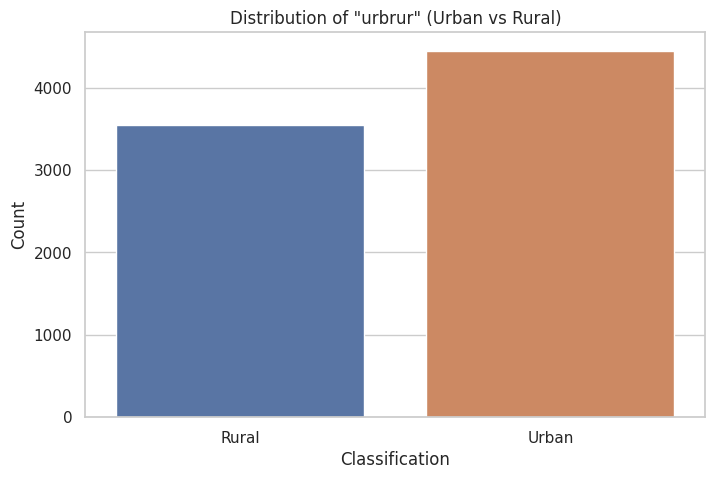

urbrur
2    4450
1    3550
Name: count, dtype: int64

In [5]:
# Analyzing and visualizing 'urbrur' column

# 1=Rural ,  Urban=2

# Counting the frequency of each category in 'urbrur'
urbrur_counts = df_household['urbrur'].value_counts()

# Visualizing the counts
plt.figure(figsize=(8, 5))
sns.barplot(x=urbrur_counts.index, y=urbrur_counts.values)
plt.title('Distribution of "urbrur" (Urban vs Rural)')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Rural', 'Urban'])  
plt.show()

urbrur_counts

## Feature Extraction

We are expecting you to prepare new variables from the Individual dataset. You can combine these 2 datasets via 'hid' columns. First of all, the Individual dataset contains the characteristics of individuals within each family. After deduplicating(or aggregation) these features based on the 'hid' column, that is, after creating new variables, we expect you to add them to the Household dataset as new feature columns. Examples are given to you below. You may increase the number of features extracted.

Note: Since you will be generating new variables from Individual dataset, you can perform similar data exploratory analyzes within this dataset.

Please remember, it's important for us to to analyze and interpret new variables to understand dataset.

In [6]:
df_individual.head()

,hid,idno,relation,sex,age,age_month,marstat,religion,school_attend,educ_attain,...,disability,blind,deaf,mental,ch_weight,ch_height,children_born,children_surv,births_12m,hhweight
0,00a191396a2,1,1,1,31,NaN,1,6,1,3,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,322.972201
1,0111c7fa67c,1,1,2,54,NaN,2,6,2,1,...,0,0,0,0,NaN,NaN,1.0,1.0,0.0,322.972201
2,01410d9c60d,1,1,1,32,NaN,2,6,1,3,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,256.192235
3,01410d9c60d,2,4,2,55,NaN,4,6,4,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,256.192235
4,015ff82b55c,1,1,1,54,NaN,2,7,4,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,268.334047


* Average Age of Household Members (Ortalama Hanehalkı Yaşı): The mean age of individuals within each household.
* Average Educational Attainment (Ortalama Eğitim Seviyesi): The mean educational attainment level of household members.
* Number of Individuals with Disabilities (Engelli Birey Sayısı): The count of household members with disabilities.
* Average Births in Last 12 Months (Son 12 Ayda Ortalama Doğum Sayısı): The mean number of births in the last 12 months per household.
* Household Religious Diversity (Hanehalkı Dini Çeşitliliği): A measure of the diversity of religious affiliations within each household.

In [7]:
# Aggregating data to create new variables at the household level

# Grouping by 'hid'
grouped_data = df_individual.groupby('hid')

# Creating the new variables
new_variables = {
    'Average Age': grouped_data['age'].mean(),
    'Average Education Level': grouped_data['educ_attain'].mean(),
    'Number of Disabled Individuals': grouped_data['disability'].sum(),
    'Average Births Last 12 Months': grouped_data['births_12m'].mean(),
    'Religious Diversity': grouped_data['religion'].nunique()
}

# Converting the new variables into a DataFrame
new_variables_df = pd.DataFrame(new_variables)

# Displaying the first few rows of the new variables
new_variables_df.reset_index(inplace = True)
new_variables_df

,hid,Average Age,Average Education Level,Number of Disabled Individuals,Average Births Last 12 Months,Religious Diversity
0,00076fe9d44,19.000000,0.800000,1,0.0,1
1,001732acf20,50.000000,0.000000,0,NaN,1
2,0025c7eb6b0,27.000000,2.333333,0,0.0,1
3,0025c83c02c,18.250000,0.750000,0,0.0,1
4,002a356ac9f,24.800000,1.600000,1,0.0,1
...,...,...,...,...,...,...
7995,ffdf35cd744,22.333333,0.666667,0,0.0,1
7996,ffdfe160ab5,32.888889,1.000000,0,0.0,1
7997,ffe1892f851,15.875000,1.375000,0,0.5,1
7998,fff47529494,16.000000,1.500000,0,0.0,1


In [8]:
model_data = pd.merge(df_household, new_variables_df, on = 'hid', how = 'left')
model_data

,hid,geo1,geo2,ea,urbrur,hhsize,statocc,rooms,bedrooms,floor,...,quint_nat,quint_urb,quint_rur,hhweight,popweight,Average Age,Average Education Level,Number of Disabled Individuals,Average Births Last 12 Months,Religious Diversity
0,00a191396a2,1,11,11066,2,1,1,1,1,2,...,5,4.0,NaN,322.972201,322.972201,31.000000,3.000000,0,NaN,1
1,0111c7fa67c,1,11,11066,2,1,2,1,0,2,...,5,4.0,NaN,322.972201,322.972201,54.000000,1.000000,0,0.0,1
2,01410d9c60d,1,11,11087,2,2,1,4,1,2,...,5,4.0,NaN,256.192235,512.384469,43.500000,2.000000,0,NaN,1
3,015ff82b55c,1,11,11094,2,2,1,1,1,2,...,5,5.0,NaN,268.334047,536.668093,50.000000,1.000000,0,0.0,2
4,01c39d3df0d,1,11,11094,2,1,2,3,2,6,...,5,5.0,NaN,268.334047,268.334047,41.000000,3.000000,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,dbeabfbf152,10,109,109046,2,4,2,2,1,1,...,3,2.0,NaN,178.671294,714.685176,19.500000,1.000000,0,0.0,1
7996,e31748e1596,10,109,109040,2,2,1,5,2,2,...,4,3.0,NaN,364.287408,728.574817,40.000000,3.000000,1,0.0,1
7997,eba931cf345,10,109,109046,2,5,1,4,3,2,...,4,3.0,NaN,178.671294,893.356469,36.600000,1.200000,0,0.0,1
7998,f927f4e982d,10,109,109040,2,3,1,4,1,2,...,4,4.0,NaN,364.287408,1092.862225,67.333333,1.333333,1,0.0,1


## Modeling & Model Performances

Data Preprocessing Steps; 
 * Remove ID and Geo Columns 
 * Handle missing values etc.
 * Handle categoric variables etc.
 * Handle numeric variables etc.
 * Split Train/Test (70/30)
 
Model Selection
 * Since it's a classification problem you can use several classification algorithms such as  Random Forest, and Gradient Boosting etc. And compare their performances.
 
Model Training and Evaluation
 * Train each model on the training set. Evaluate their performance using metrics like accuracy, precision, recall, and F1-score. Create a confusion matrix for each model.



Please remember, it's important for us to add your comments about each model performances.

### 1) Modeling

In [9]:
# Change target column definitian for a binary classification problems

# 1=Rural ,  Urban=2

model_data['urbrur'] = model_data['urbrur'].replace({2:0 , 1:1})

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
data = model_data

# Removing the ID and geo columns 
# Since quint_rur and quint_urb columns are too correlated with our target we did also remove these features
data.drop(['hid','geo1','geo2', 'quint_rur','quint_urb'], axis=1, inplace=True) 


# If we had not removed these two features(quint_rur, quint_urb), what would have encountered in the model results? 


# Identifying categorical and numerical columns


# Handling missing values for numerical columns


# Encoding categorical variables

 
# Handling numerical variables


# Splitting the dataset into features (X) and target variable (y)
X = data.drop('urbrur', axis=1)
y = data['urbrur']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Training the Model1 Classifier


In [ ]:
# Training the Model2 Classifier


### 2) Model Performances

 ### 2.1) Model 1

In [ ]:
# Model Evaluation


# Plotting the confusion matrix



In [ ]:
df_features = pd.DataFrame(model1.feature_importances_, columns = ['Importance'],
             index = X_train.columns).sort_values('Importance', ascending = False).reset_index()
df_features.rename(columns = {'index':'Variable'}, inplace = True)
df_features

 ### 2.2) Model 2

In [ ]:
# Model Evaluation


# Plotting the confusion matrix



In [ ]:
df_features = pd.DataFrame(model2.feature_importances_, columns = ['Importance'],
             index = X_train.columns).sort_values('Importance', ascending = False).reset_index()
df_features.rename(columns = {'index':'Variable'}, inplace = True)
df_features

## Save Model

In [ ]:
model_file = 'finalized_model.pickle'
pickle.dump(model, open(model_file, 'wb')) # model is your final model object.

variable_file = 'model_variables.pickle'
pickle.dump(df_features, open(variable_file, 'wb')) # df_features is dataframe that holds final model variables.

In [ ]:
# Write your test predictions to Mongo DB

